In [1]:
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
def seq(length):
    string=''
    for i in range(length):
        string=string+random.choice(Seq('AUGC'))
    return string        

In [3]:
seq1=seq(int(input("Enter sequence length=")))

Enter sequence length=100


In [4]:
seq2=seq(int(input("Enter sequence length=")))

Enter sequence length=100


In [5]:
print(seq1)
print(seq2)


UGUGACGCCCGAUCCACUGCAUUUAAUGAUAGUAGGUACCUGACUGAGACUUACAACAGAGUUUUACAAGCGGGUUGUUGAUAUUCACAAACAUAGCGAC
UACUAAGUUACGGAAUGACCUGUAAAGUCUCUAAGCCGAAGUAUCAGCCGAAAUGAUAUUGUGCCACAUGUGCCUAUGGAGCUUAUAUUACCAUACUGAG


# One-one dot plot

In [6]:
def dot(seq1,seq2):
    l1=[]
    l2=[]
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            if seq1[i]==seq2[j]:
                l1.append(j)
                l2.append(i)
    plt.figure(figsize=(20,20))
    plt.grid()
    sns.regplot(x=l1,y=l2,marker="o",fit_reg=False)
    xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
    yt=plt.yticks(np.arange(len(list(seq2))),list(seq2))
    plt.xlabel("Sequance 1")
    plt.ylabel("Sequance 2")

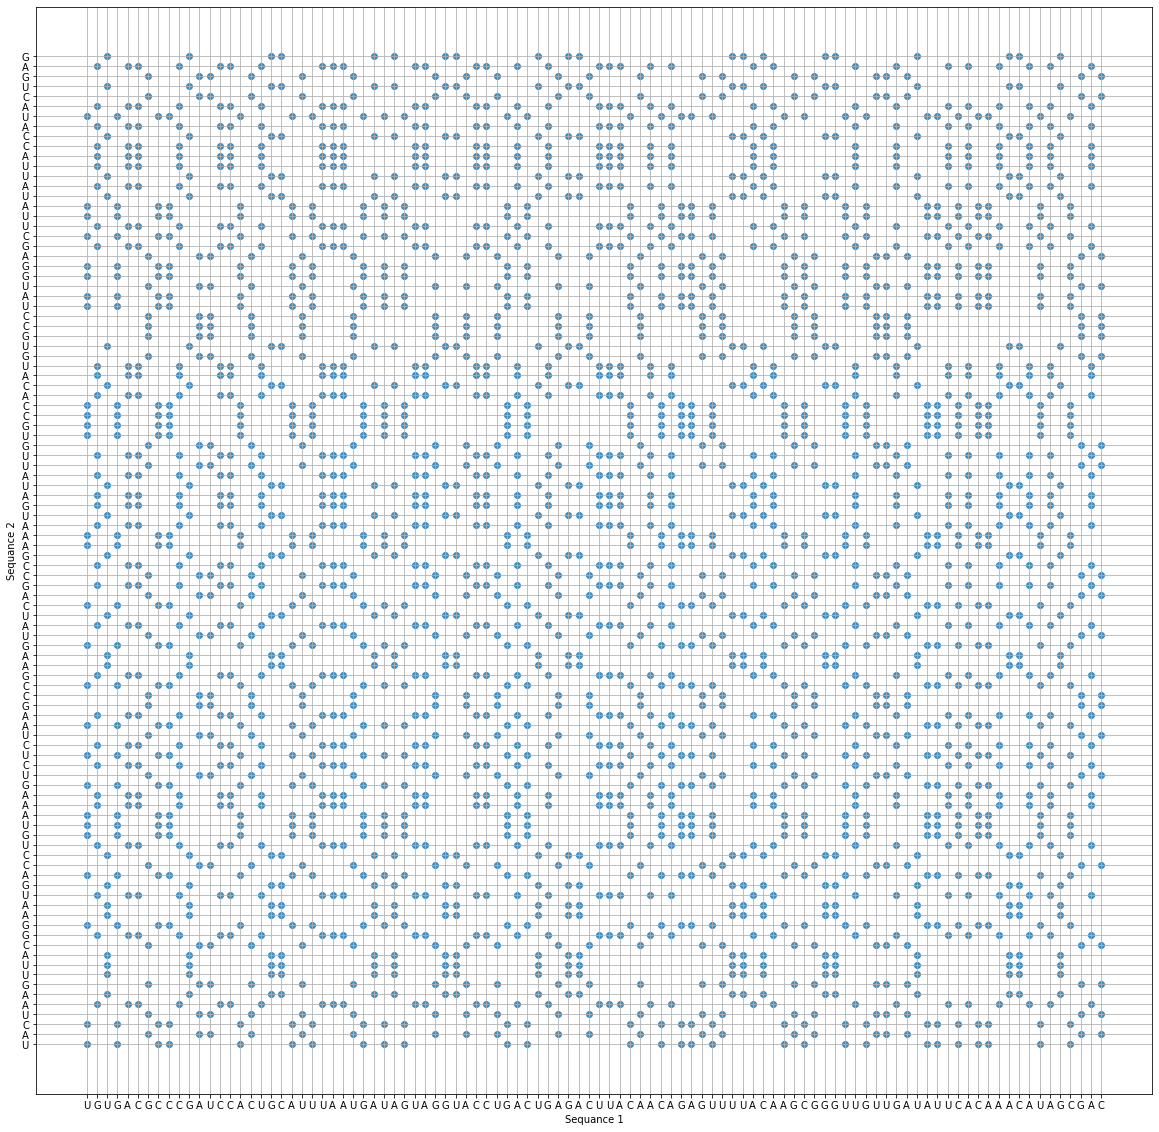

In [7]:
dot(seq1,seq2) 


# Maximum region

In [8]:
def groupSequence(seq1,se2): 
    final=[]
    l1=[]
    l2=[]
    for i in range(len(seq1)):
        if seq1[i]==seq2[i]:
            l1.append(i)
            l2.append(seq1[i])
    start_bound = [i for i in range(len(l1)-1) 
        if (l1 == 0 or l1[i] != l1[i-1]+1) 
        and l1[i + 1] == l1[i]+1] 
  
    end_bound = [i for i in range(1, len(l1)) 
        if l1[i] == l1[i-1]+1 and
        (i == len(l1)-1 or l1[i + 1] != l1[i]+1)] 
  
    for i in range(len(start_bound)):
        listToStr = ''.join([str(elem) for elem in l2[start_bound[i]:end_bound[i]+1]]) 
        final.append(listToStr)
    return max(final,key=len),l1     

In [9]:
seq,xlab=groupSequence(seq1,seq2)

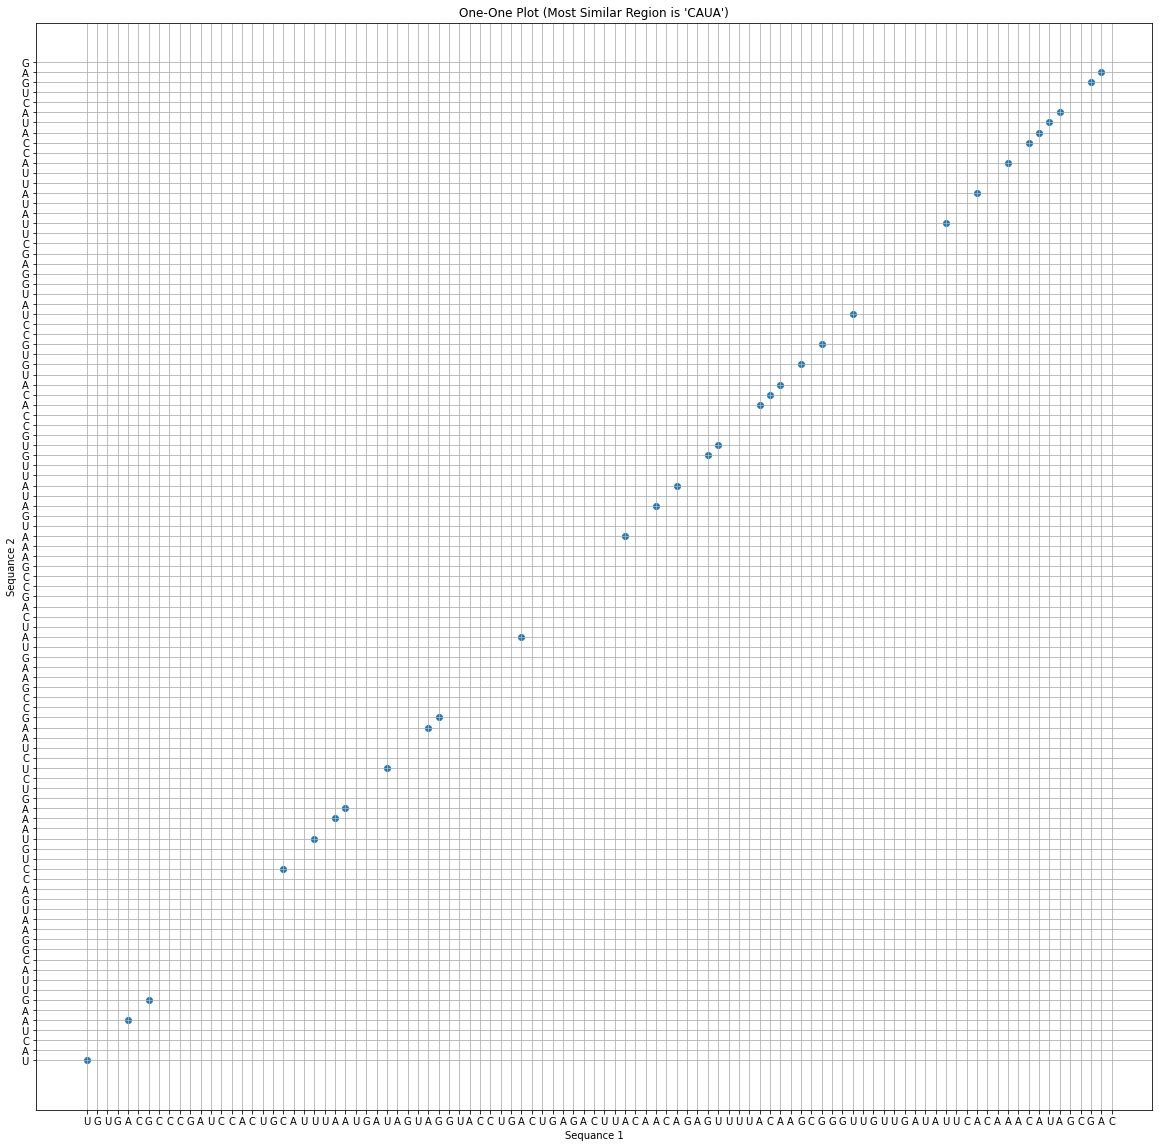

In [10]:
plt.figure(figsize=(20,20))
plt.scatter(xlab,xlab)


xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
yt=plt.yticks(np.arange(len(list(seq2))),list(seq2))


plt.xlabel("Sequance 1")
plt.ylabel("Sequance 2")
plt.title("One-One Plot (Most Similar Region is '{}')".format(seq))
plt.grid()

# Sliding window


In [11]:
def window(seq1,seq2,thresold,ws):

    l1=list(seq1)
    l2=list(seq2)

    seq11 = ["".join(l1[i:i+ws]) for i in range(0, len(l1)) if(len(l1[i:i+ws])==ws)] 
    seq22 = ["".join(l2[i:i+ws]) for i in range(0, len(l2)) if(len(l2[i:i+ws])==ws)] 
    x=[]
    y=[]
    for i in range(len(seq11)):    
        for j in range(len(seq22)):
            count=0    
            for k in range(ws):
                #print(i,j,seq11[i],seq22[j])
                if(seq11[i][k]==seq22[j][k]):
                    count+=1
            if(count>=thresold):
                #print(seq11[i],seq22[j])
                x.append(seq11.index(seq11[i]))
                y.append(seq22.index(seq22[j]))

    plt.figure(figsize=(20,20))
    plt.scatter(x,y)

    xt=plt.xticks(np.arange(len(list(seq11))),list(seq11),rotation=90)
    yt=plt.yticks(np.arange(len(list(seq22))),list(seq22))

    plt.xlabel("Sequance 1 ({})".format(seq2))
    plt.ylabel("Sequance 2 ({})".format(seq1))
    plt.title("Window size = {}, thresold={}".format(ws,thresold))
    plt.grid()

### window size=10, threshold =8

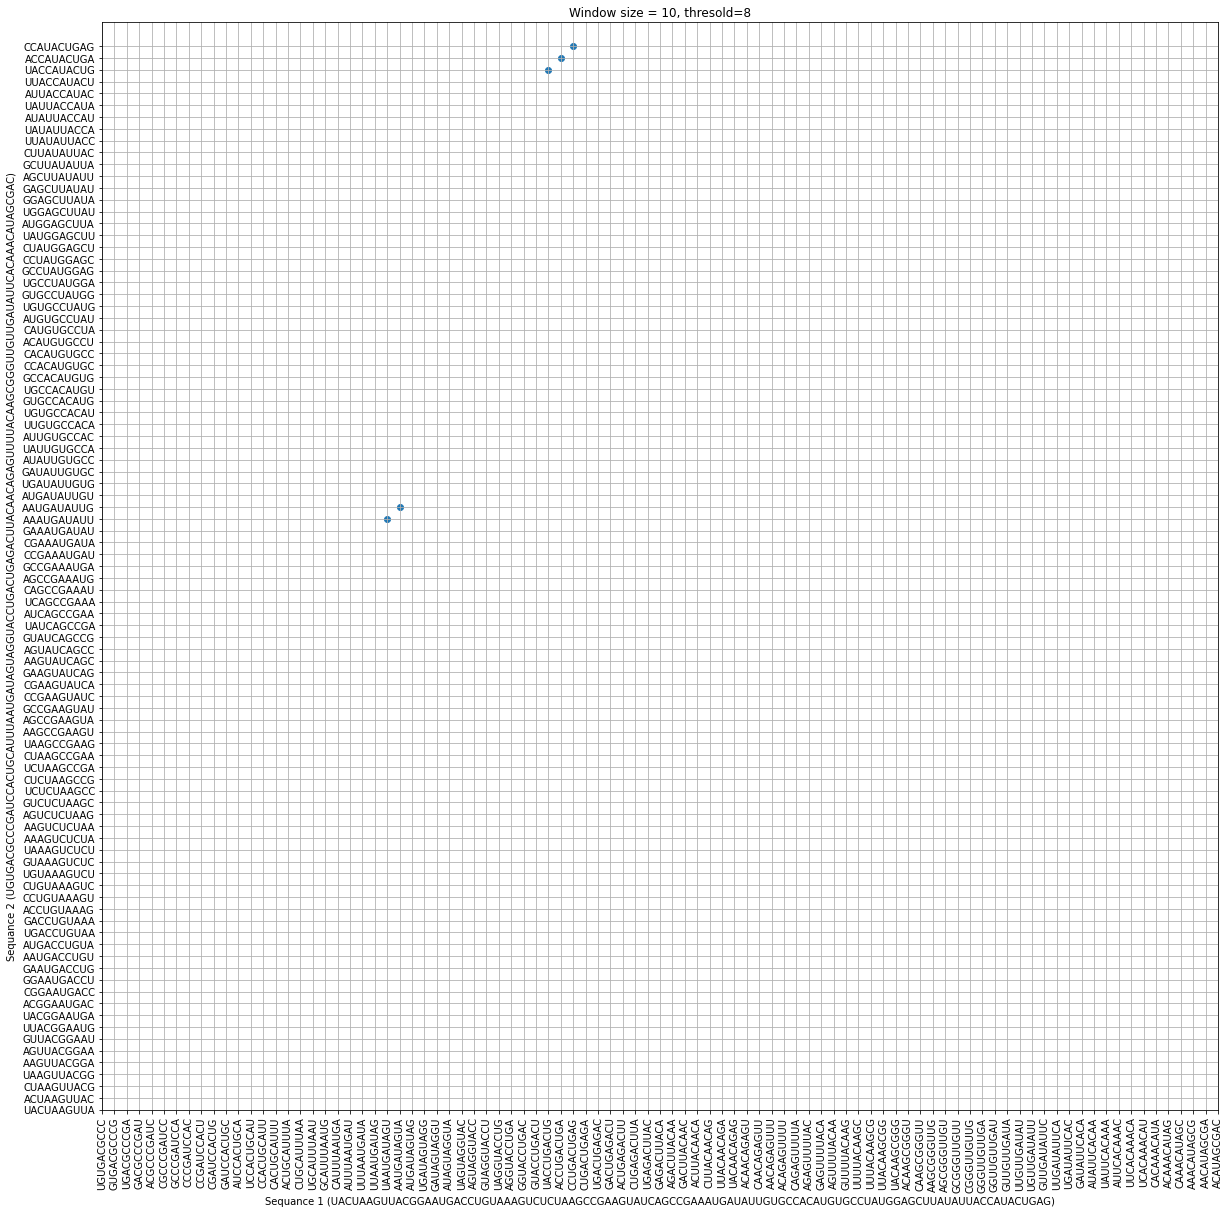

In [12]:
window(seq1,seq2,thresold=8,ws=10)

### window size=10, threshold =7

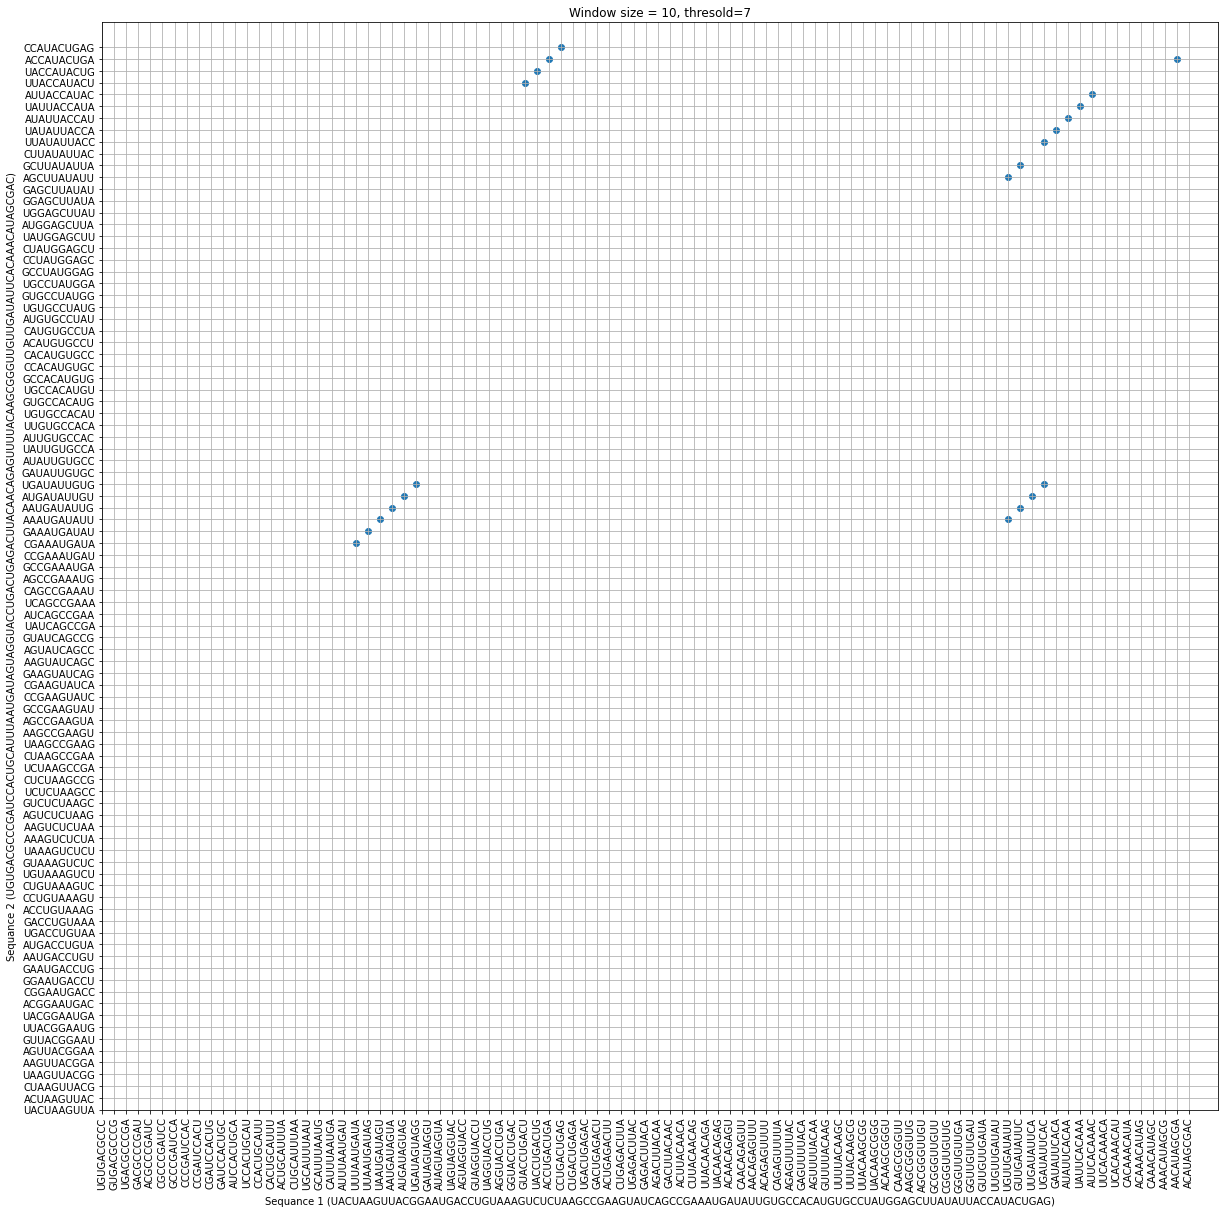

In [13]:
window(seq1,seq2,thresold=7,ws=10)

### window size=20, threshold =13

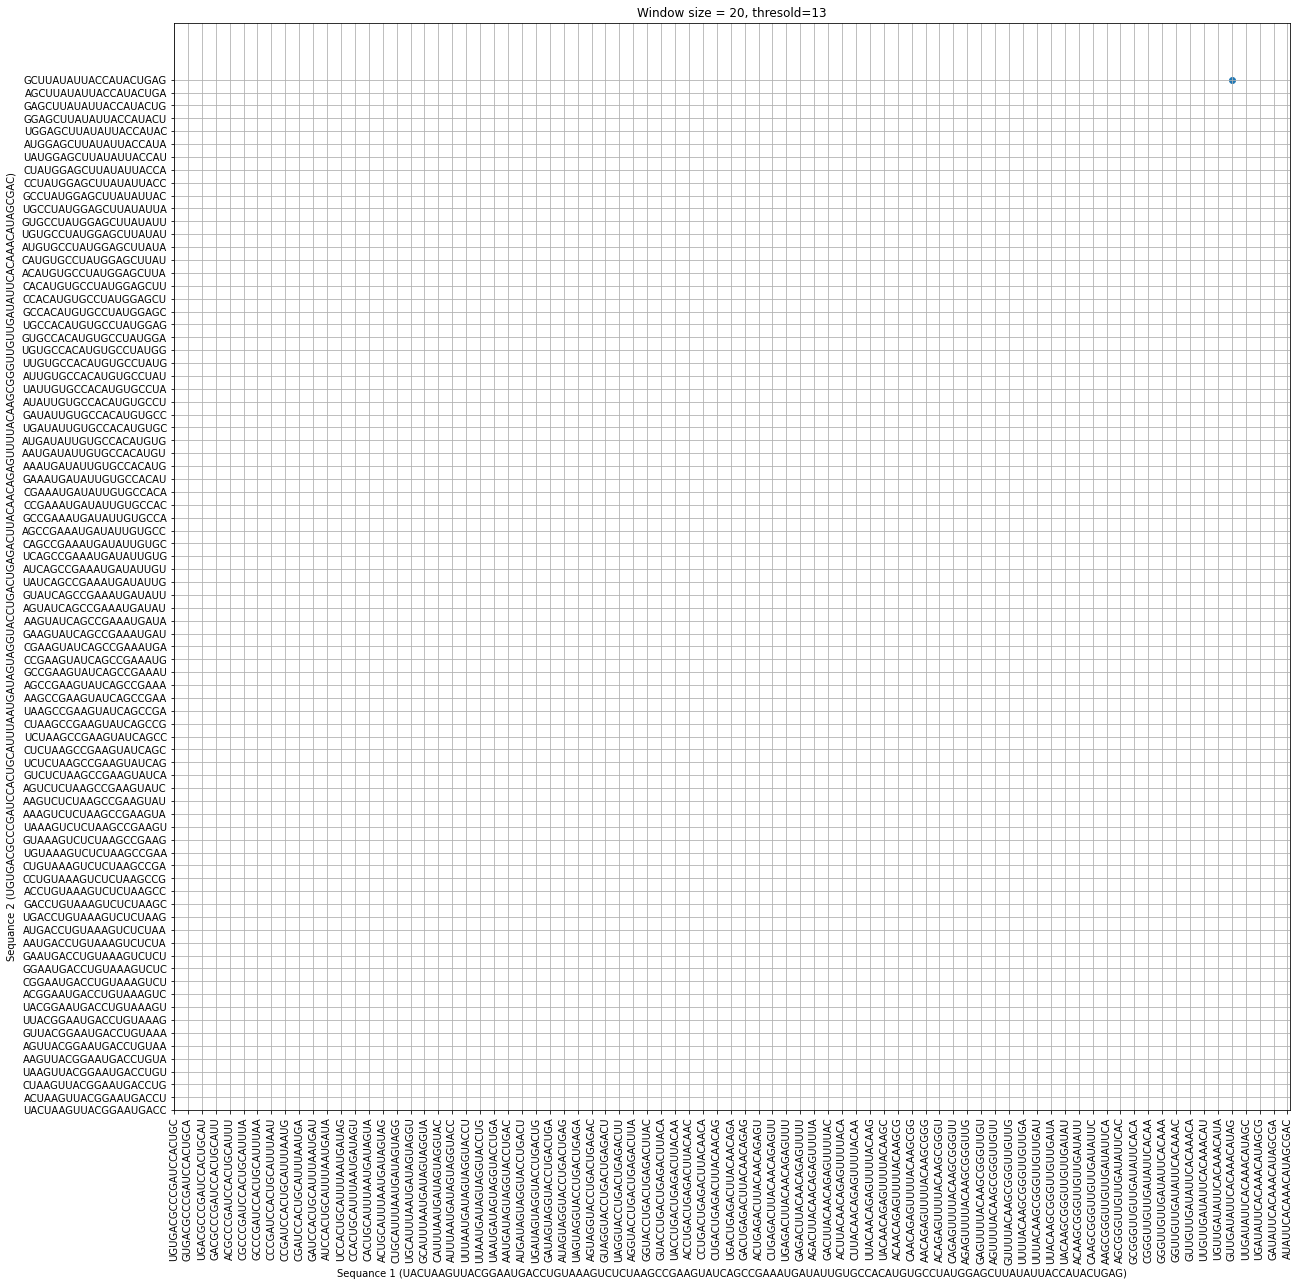

In [14]:
window(seq1,seq2,thresold=13,ws=20)

### window size=20, threshold =10

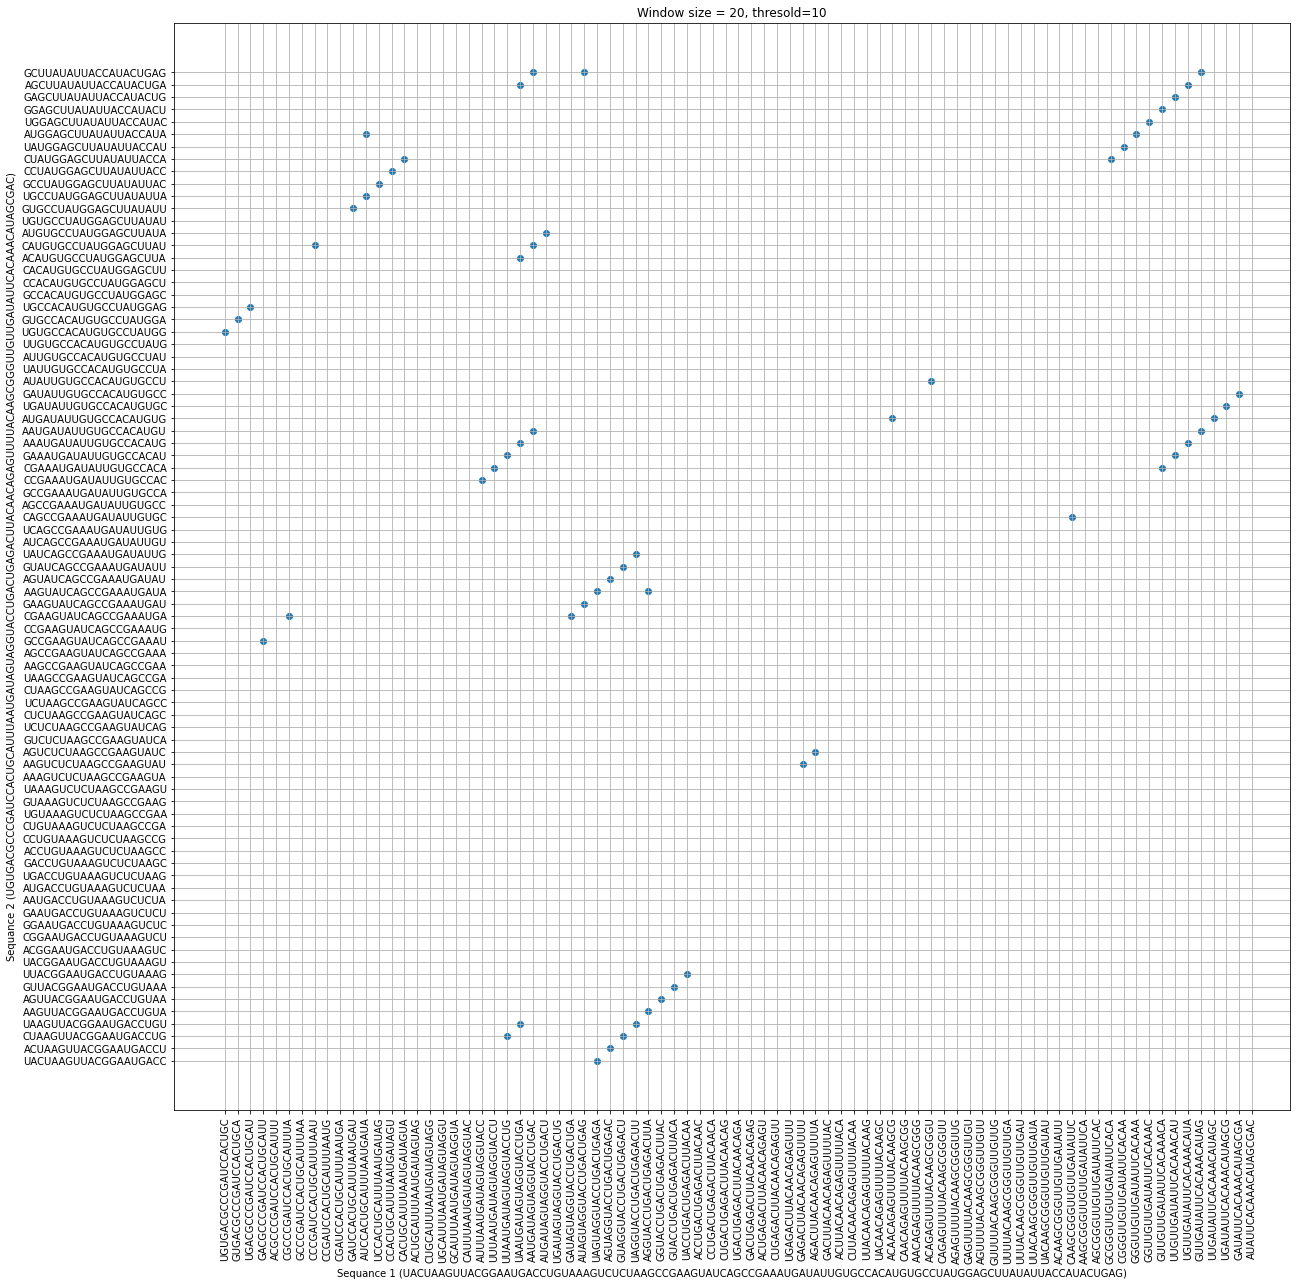

In [15]:
window(seq1,seq2,thresold=10,ws=20)